## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [393]:
import warnings 
warnings.filterwarnings('ignore')

In [394]:
import pandas as pd
#Load data into data frame & print 10 random rows
stud_df = pd.read_csv("students-data.csv",";")
stud_df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
25,GP,F,16,U,GT3,T,2,2,services,services,...,1,2,2,1,3,5,14,6,9,8
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8
45,GP,F,15,U,LE3,A,4,3,other,other,...,5,2,2,1,1,5,8,8,8,6
327,GP,M,17,R,GT3,T,2,2,services,other,...,4,4,5,5,5,4,8,11,10,10
383,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,6,5,0
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,0,7,9,8
216,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
163,GP,M,17,U,GT3,T,1,3,at_home,services,...,5,3,3,1,4,2,2,10,10,10
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,2,5,1,5,4,6,9,8,10
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,4,3,3,2,3,3,3,14,12,12


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [395]:
#Check for Nan. 
stud_df.isna().sum()
# result shows that there are no missing values. Hence nothing requires replacement with median.

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [396]:
stud_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [397]:
stud_df_categorical = stud_df.select_dtypes(exclude=['int64'])
stud_df_numeric = stud_df.select_dtypes(include=['int64'])
stud_df_categorical

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [398]:
stud_df_numeric.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [399]:
#Using VarianceThreshold

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.0)
data = selector.fit_transform(stud_df_numeric)
print(data)
data.shape

[[18  4  4 ...  5  6  6]
 [17  1  1 ...  5  5  6]
 [15  1  1 ...  7  8 10]
 ...
 [21  1  1 ... 10  8  7]
 [18  3  2 ... 11 12 10]
 [19  1  1 ...  8  9  9]]


(395, 10)

In [400]:
#MANUALLY
columns_to_remove = stud_df_numeric.var() < 1
stud_df_numeric.drop(stud_df_numeric.columns[columns_to_remove],axis=1, inplace=True)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [401]:
from sklearn.preprocessing import LabelEncoder
stud_df_categorical.apply(LabelEncoder().fit_transform)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,1,1,0,1,1,0,0
391,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0
393,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1,0


In [402]:
import pandas as pd
modified = pd.concat([stud_df_numeric, stud_df_categorical.apply(LabelEncoder().fit_transform)], axis=1)

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [403]:
import numpy as np
import pandas as pd
mark_df = pd.DataFrame()
mark_df["G1"] = np.where(stud_df_numeric["G1"] >=10, 1, 0)
mark_df["G2"] = np.where(stud_df_numeric["G2"] >=10, 1, 0)
mark_df["G3"] = np.where(stud_df_numeric["G3"] >=10, 1, 0)
mark_df.head()                

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


In [404]:
modified["G1"] = mark_df["G1"]
modified["G2"] = mark_df["G2"]
modified["G3"] = mark_df["G3"]   

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [405]:
X = mark_df.loc[:, ['G1','G2']]
X

,G1,G2
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
390,0,0
391,1,1
392,1,0
393,1,1


In [406]:
Y = mark_df.iloc[:, -1]
Y

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int32

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

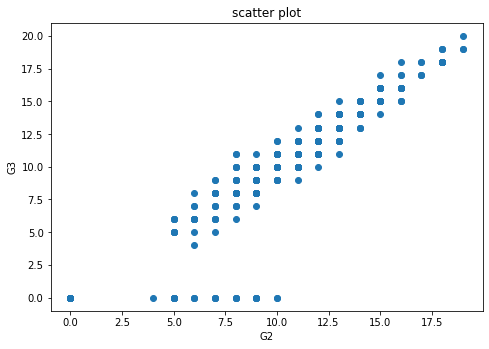

In [407]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(stud_df_numeric["G2"], stud_df_numeric["G3"])
ax.set_xlabel('G2')
ax.set_ylabel('G3')
ax.set_title('scatter plot')
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

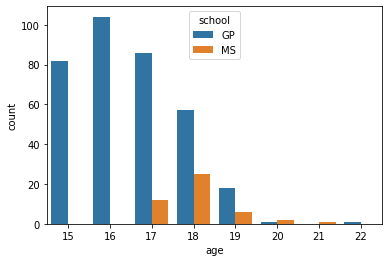

In [408]:
from seaborn import countplot
from matplotlib.pyplot import figure, show

figure()
countplot(data=stud_df,x='age', hue='school')
show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [409]:
print('Total Records : ',modified.shape)
X = modified.iloc[:, : -1]
Y = modified.iloc[:, -1]
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = .24)
print('Training Records: ',X_train.shape)
print('Testing Records: ',X_test.shape)

Total Records :  (395, 27)
Training Records:  (300, 26)
Testing Records:  (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [410]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [411]:
sc=StandardScaler()
lr = LogisticRegression()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
lr.fit(scaledX_train,Y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledX_test,Y_test))
print("What is the Training Accuracy")
print(lr.score(scaledX_train,Y_train))

What is the Testing Accuracy
0.631578947368421
What is the Training Accuracy
0.7466666666666667


In [412]:
predicted = lr.predict(scaledX_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,predicted))
print(classification_report(Y_test,predicted))


[[55 11]
 [24  5]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        66
           1       0.31      0.17      0.22        29

    accuracy                           0.63        95
   macro avg       0.50      0.50      0.49        95
weighted avg       0.58      0.63      0.59        95



In [413]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(Y_test,predicted,average=None))
print(recall_score(Y_test,predicted,average=None))
print(f1_score(Y_test,predicted,average=None))


[0.69620253 0.3125    ]
[0.83333333 0.17241379]
[0.75862069 0.22222222]


# Naive bayes with Iris data

### Import Iris.csv

In [414]:
import pandas as pd
#Load data into data frame & print 10 random rows
iris_df = pd.read_csv("Iris-1.csv")
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,113,6.8,3.0,5.5,2.1,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
27,28,5.2,3.5,1.5,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa


In [415]:
#Check for Nan. 
iris_df.isna().sum()
# result shows that there are no missing values. Hence nothing requires replacement with median.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [416]:
iris_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,38.25,75.5,112.75,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [418]:
from sklearn.model_selection import train_test_split
# Copy all the predictor variables into X dataframe. Since 'Class_num' is dependent variable drop it
#X = iris_df.drop('Species', axis=1)

# Copy the 'Class_num' column alone into the y dataframe. This is the dependent variable
#Y = iris_df["Species"]


In [419]:
#Manually
array = iris_df.values

X = array[:,0:4]
Y = array[:,4]

#Check the dataset
print(Y)
print(X)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.0 1.3 1.4 1.0 1.5 1.0 1.4 1.3 1.4 1.5 1.0 1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.0 1.1 1.0 1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.0 1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.0 1.9 2.1 2.0 2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.0 2.0 1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.0 2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.0 2.3 1.8]
[[1 5.1 3.5 1.4]
 [2 4.9 3.0 1.4]
 [3 4.7 3.2 1.3]
 [4 4.6 3.1 1.5]
 [5 5.0 3.6 1.4]
 [6 5.4 3.9 1.7]
 [7 4.6 3.4 1.4]
 [8 5.0 3.4 1.5]
 [9 4.4 2.9 1.4]
 [10 4.9 3.1 1.5]
 [11 5.4 3.7 1.5]
 [12 4.8 3.4 1.6]
 [13 4.8 3.0 1.4]
 [14 4.3 3.0 1.1]
 [15 5.8 4.0 1.2]
 [16 5.7 4.4 1.5]
 [17 5.4 3.9 1.3]
 [18 5.1 3.5 1.4]
 [19 5.7 3.8 1.7]
 [20 5.1 3.8 1.5]
 [21 5.4 3.4 1.7]
 [22 5.1 3.7 1.5]
 [2

### Find the distribution of target variable (Class)

In [420]:
iris_df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

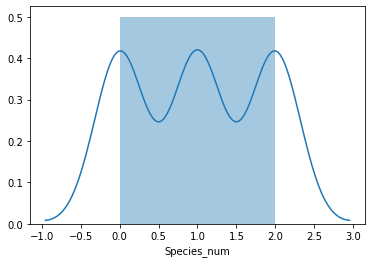

In [421]:
#Definition to convert categories to numerics.
def Class_to_numeric(x):
    if x=='Iris-setosa':
        return 0
    if x=='Iris-versicolor':
        return 1
    if x=='Iris-virginica':
        return 2
    
    
iris_df["Species_num"] = iris_df['Species'].apply(Class_to_numeric)
iris_df = iris_df.drop("Species",axis=1)
iris_df

import seaborn as sns
sns.distplot(iris_df['Species_num'], kde=True)

### Plot the distribution of target variable using histogram

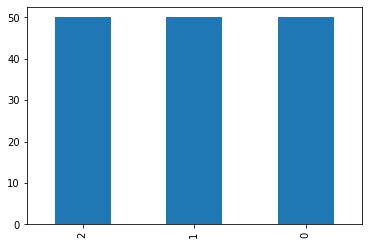

In [422]:
pd.value_counts(iris_df["Species_num"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

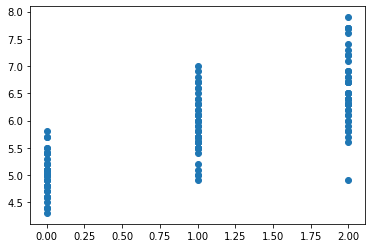

In [423]:
# Scatter plot for Sepal Length against class
plt.scatter(x=iris_df["Species_num"],y=iris_df["SepalLengthCm"])

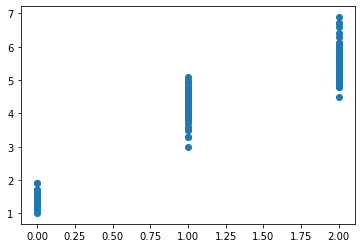

In [424]:
# Scatter plot for Petal Length against class
plt.scatter(x=iris_df["Species_num"],y=iris_df["PetalLengthCm"])

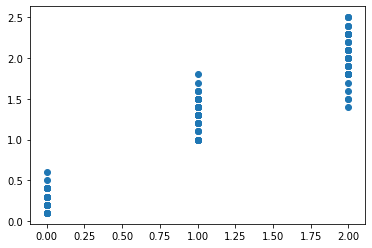

In [425]:
# Scatter plot for Petal Width against class
plt.scatter(x=iris_df["Species_num"],y=iris_df["PetalWidthCm"])

### Summary Statistics and explain insights for at least 2 variables

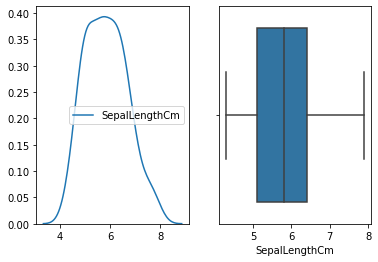

In [426]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(iris_df['SepalLengthCm'], ax=axes[0])
sns.boxplot(iris_df['SepalLengthCm'], ax=axes[1])
plt.show()
#No Outliers

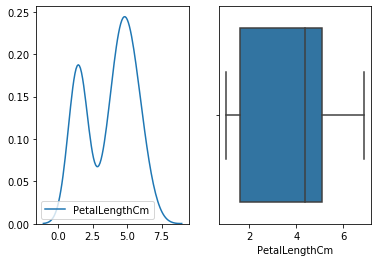

In [427]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(iris_df['PetalLengthCm'], ax=axes[0])
sns.boxplot(iris_df['PetalLengthCm'], ax=axes[1])
plt.show()
#No outliers, but multiple peak

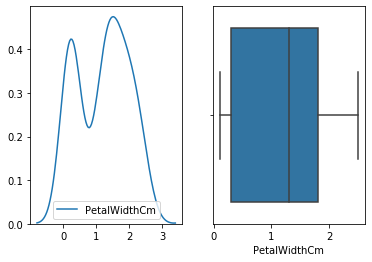

In [428]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(iris_df['PetalWidthCm'], ax=axes[0])
sns.boxplot(iris_df['PetalWidthCm'], ax=axes[1])
plt.show()
#No outliers, but multiple peak

In [429]:
var = iris_df.var()
var

# Each independent variable seem to be having significant variance within. So, no variables dropped.

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
Species_num         0.671141
dtype: float64

### Correlation among all variables and give your insights

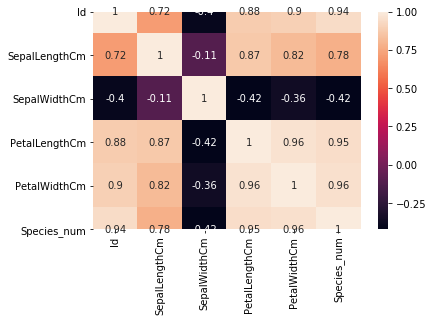

In [430]:
corr = iris_df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(corr, annot=True)

# Sepal Width in (cm) is having a corr of -0.42 with the target variable Class_num. So, dropping the Sepal width from data frame.

iris_df_dropped = iris_df.drop("SepalWidthCm", axis = 1)

In [431]:
iris_df_dropped.sample(10)

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species_num
44,45,5.1,1.9,0.4,0
20,21,5.4,1.7,0.2,0
140,141,6.7,5.6,2.4,2
143,144,6.8,5.9,2.3,2
128,129,6.4,5.6,2.1,2
71,72,6.1,4.0,1.3,1
35,36,5.0,1.2,0.2,0
53,54,5.5,4.0,1.3,1
146,147,6.3,5.0,1.9,2
10,11,5.4,1.5,0.2,0


### Split data in Training and Validation in 80:20

In [432]:

from sklearn.model_selection import train_test_split
# Copy all the predictor variables into X dataframe. Since 'Class_num' is dependent variable drop it
X = iris_df_dropped.drop('Species_num', axis=1)

# Copy the 'Class_num' column alone into the y dataframe. This is the dependent variable
Y = iris_df_dropped["Species_num"]
# Split X and y into training and test set in 80:20 ratio

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

#Split data done after the scaling

### Do Feature Scaling

In [433]:
from sklearn.preprocessing import minmax_scale
#X = minmax_scale(X)

# Split X and y into training and test set in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

### Train and Fit NaiveBayes Model

In [434]:
#Fit the model
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)
Acc_score = model.score(X_test,Y_test)
print("Accuracy score =",Acc_score)

Accuracy score = 1.0


In [435]:
#Predict & # show accuracy
Ypredict = model.predict(X_test)
model_score = metrics.accuracy_score(Y_test,Ypredict)
print(model_score)

1.0


### Print Accuracy and Confusion Matrix and Conclude your findings

In [436]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(Y_test,Ypredict,average=None))
print(recall_score(Y_test,Ypredict,average=None))
print(f1_score(Y_test,Ypredict,average=None))

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [437]:
# show Confusion Matrix

#Show precision and Recall metrics

print(metrics.classification_report(Y_test, Ypredict))
print(metrics.confusion_matrix(Y_test, Ypredict))

# Findings
#1. This model has no recall  classification 
#2. Precision - Ability to predict / correctness of prediction is 100%.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
